<a href="https://colab.research.google.com/github/amey1942007/Fashion_MNIST-Pytorch-Model/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#========================================================================================================================================================== Import required Module and Library ==========================================================================================================================================================

In [72]:
# Pytorch
import torch

# Datasets of Fashion MNIST
from torchvision import datasets

# import dataloader which creates an iterable around the dataset of 60,000 training and 10,000 testing data
from torch.utils.data import dataloader

#import pytorch neural network module for making custom layers
from torch import nn

# import a converter which converts the object into tensor (image---> tensor)
from torchvision.transforms import ToTensor

# data manupulating tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Randomization library
import random

## Training data checks ==========================================================================================================================================================

In [73]:
# importing data
train = datasets.FashionMNIST(root='data',train=True,download=True,transform=ToTensor())


In [74]:
# checking the data
train #60,000 samples for training
train.data.shape #is a tensor of (60000,28,28) # an image of 28*28 pixel

torch.Size([60000, 28, 28])

## Test data checks ==========================================================================================================================================================

In [75]:
#importing the test data
test = datasets.FashionMNIST(root='data',train=False,download=True,transform=ToTensor())

In [76]:
# checking the data
test.data.shape # shows a tensor of (10000,28,28)

torch.Size([10000, 28, 28])

## Dataloader checks ==========================================================================================================================================================

In [77]:
#splitting the dta into batches of 100
train_dataloader = dataloader.DataLoader(dataset=train,batch_size=100)
test_dataloader = dataloader.DataLoader(dataset=test,batch_size=100)

In [78]:
len(test_dataloader) # shows that we have sucess created a batch of 100

100

## Model construction ==========================================================================================================================================================

In [79]:

# here we will create the neural network
class NeuralNetwork(nn.Module): # this nn.Module inherites the property of its super class by calling super().__Init__()
  def __init__(self) -> None:
    super().__init__() # as discussed earlier is  used for inheritance

    self.flatten = nn.Flatten() # Flattens

    self.linear_relu_stack = nn.Sequential(
        nn.Linear(in_features=784,out_features=512), # applies the linear transformationa and creates the first layer

        nn.ReLU(), # applies the rectified linear Unit to the output of the first layer to make the output in 0-1 range

        nn.Linear(in_features=512,out_features=512), # applies the linear transformationa and creates the second layer

        nn.ReLU(), # applies the rectified linear Unit to the output of the second layer to make the output in 0-1 range

        nn.Linear(in_features=512,out_features=10), # finally applies a linear transformation and predicts the category of clothes
        )

  def forward(self,x):
    flatten_input = self.flatten(x)

    #appling our neural network to the flatten input
    network = self.linear_relu_stack(flatten_input)

    return network # return the result

model = NeuralNetwork() # create the model

## ==========================================================================================================================================================

In [80]:
loss = nn.CrossEntropyLoss() # we use cross Entropy loss because the output of our network in 10 (multiple)

optimiser = torch.optim.SGD(model.parameters(),lr=0.01) # create an optimiser to change the weight and bias and calculate gradient


## Function defining ==========================================================================================================================================================

In [81]:
# here we define our training and test loops
def Training(dataloader,model,loss,optimiser):
  model.train() # set the model into training mode

  for batch_number , (x,y) in enumerate(dataloader):
    y_predicted = model(x) # calculate the predicted answer for the data

    l = loss(y_predicted,y) # calculate the loss

    optimiser.zero_grad() # set the gradient to zero

    l.backward() # calculate the derivative in the the backpropagation

    optimiser.step() # change the weight and bias according to the loss and learnig rate

    if batch_number%100==0:
      print(f'current loss: {l.item():.5f}  , batch number: {batch_number}') # print the status in every 100 batches

def Test(dataloader,model,loss):
  model.eval() # sets the model to eval and not to update the computational graph

  test_loss , correct = 0,0 # make a counter for the correct answer given an wrong answer given

  with torch.no_grad():
    for x,y in dataloader:
      y_predicted = model(x)

      test_loss += loss(y_predicted,y).item()
      correct += (y_predicted.argmax(1)==y).type(torch.float).sum().item()

  test_loss /= len(dataloader) # calculate the average loss or wrong answer reported per batch

  correct /= 10000 # calculate the accuracy i.e,The amount of correct category guess by the model

  print(f'\n Test Evaluation result: \n Accuracy: {(correct*100):.2f},\n Avg loss:{test_loss:.3f}')

##         Training and Testing Loop =====================================================================================================================================================

In [82]:
n_epochs = 25 # number of times i want to run
for i in range(n_epochs):
  print(f"\n\n   Epoch {i+1}  -------------------- \n")

  Training(train_dataloader,model,loss,optimiser)
  Test(test_dataloader,model,loss)
print(f"Done!\n")





   Epoch 1  -------------------- 

current loss: 2.30473  , batch number: 0
current loss: 2.17090  , batch number: 100
current loss: 1.88636  , batch number: 200
current loss: 1.40190  , batch number: 300
current loss: 1.13488  , batch number: 400
current loss: 1.05088  , batch number: 500

 Test Evaluation result: 
 Accuracy: 65.52,
 Avg loss:0.958


   Epoch 2  -------------------- 

current loss: 0.93552  , batch number: 0
current loss: 0.80976  , batch number: 100
current loss: 0.87473  , batch number: 200
current loss: 0.74843  , batch number: 300
current loss: 0.66688  , batch number: 400
current loss: 0.77985  , batch number: 500

 Test Evaluation result: 
 Accuracy: 73.87,
 Avg loss:0.726


   Epoch 3  -------------------- 

current loss: 0.63813  , batch number: 0
current loss: 0.59879  , batch number: 100
current loss: 0.65231  , batch number: 200
current loss: 0.65720  , batch number: 300
current loss: 0.57501  , batch number: 400
current loss: 0.68525  , batch number: 500

## Visualization ==========================================================================================================================================================

simpleNN predict as Sneaker ; truth is Sneaker


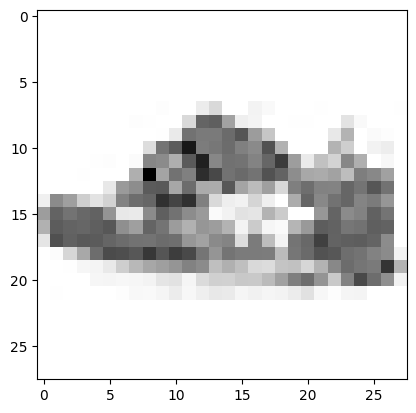

In [83]:
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Get a single random index
random_idx = random.randint(0, 9999)

# Display the image from the chosen random index
plt.imshow(test.data[random_idx], cmap = "Greys")

# Get the pixel data (x) from the same random index
x = test[random_idx][0]

# Get the true / correct label (y) from the same random index
y = test[random_idx][1]


with torch.no_grad():
    pred = model(x)                     # predict with model
    prediction = labels[pred[0].argmax(0)] # find predicted label
    truth      = labels[y]                 # true label

    print(f"simpleNN predict as {prediction} ; truth is {truth}")

## Saving the model's state dict ==========================================================================================================================================================

In [84]:

# Define the path where you want to save the model's state_dict
model_save_path = "fashion_mnist_model_weights.pth"

# Save the model's state_dict
torch.save(model.state_dict(), model_save_path)

print(f"Model weights saved to {model_save_path}")

Model weights saved to fashion_mnist_model_weights.pth


To load the saved weights,we first need to re-instantiate your model architecture, and then load the state dict into it. You should always load weights into a model that has the *same architecture* as the one that was saved.

In [85]:
# First, create a new instance of your NeuralNetwork model
loaded_model = NeuralNetwork()

# Load the saved state_dict into the new model instance
loaded_model.load_state_dict(torch.load("fashion_mnist_model_weights.pth"))

# Set the model to evaluation mode if you're not planning to train it further
loaded_model.eval()

print("Model weights loaded successfully into 'loaded_model'.")

Model weights loaded successfully into 'loaded_model'.
